In [68]:
# 20230304_140940
!ls -lh '/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230412_162837_mim_yolov8l/'

total 9.9M
-rw-rw-r-- 1 pamessina pamessina 5.2K Apr 13 08:15 'chest_imagenome_gold__bbox_metrics(eval_mode=chest_imagenome_trained_model,clamped,decent).pkl'
-rw-rw-r-- 1 pamessina pamessina  34K Apr 12 23:47 'chest_imagenome_gold_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'
-rw-rw-r-- 1 pamessina pamessina 838K Apr 12 23:46  dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl
-rw-rw-r-- 1 pamessina pamessina 5.8M Apr 12 23:44  dicom_id_to_pred_chest_imagenome_probs__mimiccxr_test_set.pkl
-rw-rw-r-- 1 pamessina pamessina 3.3M Apr 12 23:47  dicom_id_to_pred_probs__mimiccxr_val__chest_imagenome.pkl
-rw-rw-r-- 1 pamessina pamessina 6.7K Apr 13 08:15 'mimiccxr_test_set__bbox_metrics(eval_mode=chest_imagenome_trained_model,clamped,decent).pkl'
-rw-rw-r-- 1 pamessina pamessina  46K Apr 12 23:45 'mimiccxr_test_set_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'


In [1]:
from medvqa.utils.files import load_pickle

In [73]:
metrics = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230412_162837_mim_yolov8l/chest_imagenome_gold__bbox_metrics(eval_mode=chest_imagenome_trained_model,clamped,decent).pkl')

In [76]:
dicom_id_to_probs = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230412_162837_mim_yolov8l/dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl')

In [77]:
len(dicom_id_to_probs)

500

In [79]:
metrics.keys()

dict_keys(['mae', 'mean_mae', 'iou', 'mean_iou', 'p@0.5', 'r@0.5', 'f1@0.5', 'mean_p@0.5', 'mean_r@0.5', 'mean_f1@0.5', 'p@0.6', 'r@0.6', 'f1@0.6', 'mean_p@0.6', 'mean_r@0.6', 'mean_f1@0.6', 'p@0.7', 'r@0.7', 'f1@0.7', 'mean_p@0.7', 'mean_r@0.7', 'mean_f1@0.7', 'p@0.8', 'r@0.8', 'f1@0.8', 'mean_p@0.8', 'mean_r@0.8', 'mean_f1@0.8', 'p@0.9', 'r@0.9', 'f1@0.9', 'mean_p@0.9', 'mean_r@0.9', 'mean_f1@0.9', 'mean_p', 'mean_r', 'mean_f1', 'bbox_names'])

In [81]:
metrics['iou']

array([0.9792643 , 0.98192835, 0.9802868 , 0.9740944 , 0.98010486,
       0.9794311 , 0.97439873, 0.96337754, 0.97577435, 0.97898144,
       0.97965497, 0.9693768 , 0.97913986, 0.9787368 , 0.965141  ,
       0.9614027 , 0.96350753, 0.969063  , 0.9636345 , 0.9836078 ,
       0.97645664, 0.9777353 , 0.9651603 , 0.97050184, 0.96984464,
       0.9770825 ], dtype=float32)

In [95]:
from medvqa.evaluation.visual_module import ChestImaGenomeMLCVisualizer

In [3]:
import medvqa
from importlib import reload

In [94]:
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)
reload(medvqa.datasets.mimiccxr)
reload(medvqa.evaluation.visual_module)

<module 'medvqa.evaluation.visual_module' from '/home/pamessina/medvqa/medvqa/evaluation/visual_module.py'>

In [81]:
%matplotlib inline

In [96]:
mlc_visualizer = ChestImaGenomeMLCVisualizer(
    mlc_metrics_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/chest_imagenome_gold_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl',
    dicom_id_to_probs_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl',
    test_label_names_filename='gold_binary_labels.pkl',
    test_labels_filename='gold_imageId2binaryLabels.pkl',
    use_gold_in_test=True,
)

In [7]:
mlc_visualizer.metrics.keys()

dict_keys(['chestimagenome_label_prf1', 'chestimagenome_label_acc', 'chestimagenome_label_rocauc', 'chestimagenome_label_auc', 'chestimagenome_label_prcauc', 'chest_imagenome_label_names'])

In [8]:
for x in mlc_visualizer.metrics['chest_imagenome_label_names']:
    if len(x) == 2:
        print(x)

('nlp', 'abnormal')
('anatomicalfinding', 'lung opacity')
('anatomicalfinding', 'pleural/parenchymal scarring')
('anatomicalfinding', 'atelectasis')
('anatomicalfinding', 'pulmonary edema/hazy opacity')
('anatomicalfinding', 'mass/nodule (not otherwise specified)')
('anatomicalfinding', 'consolidation')
('anatomicalfinding', 'lung lesion')
('disease', 'pneumonia')
('anatomicalfinding', 'vascular congestion')
('anatomicalfinding', 'vascular redistribution')
('anatomicalfinding', 'airspace opacity')
('anatomicalfinding', 'pleural effusion')
('anatomicalfinding', 'linear/patchy atelectasis')
('anatomicalfinding', 'lobar/segmental collapse')
('disease', 'aspiration')
('anatomicalfinding', 'pneumothorax')
('tubesandlines', 'chest tube')
('anatomicalfinding', 'infiltration')
('technicalassessment', 'low lung volumes')
('disease', 'fluid overload/heart failure')
('anatomicalfinding', 'costophrenic angle blunting')
('anatomicalfinding', 'hyperaeration')
('anatomicalfinding', 'calcified nodule'

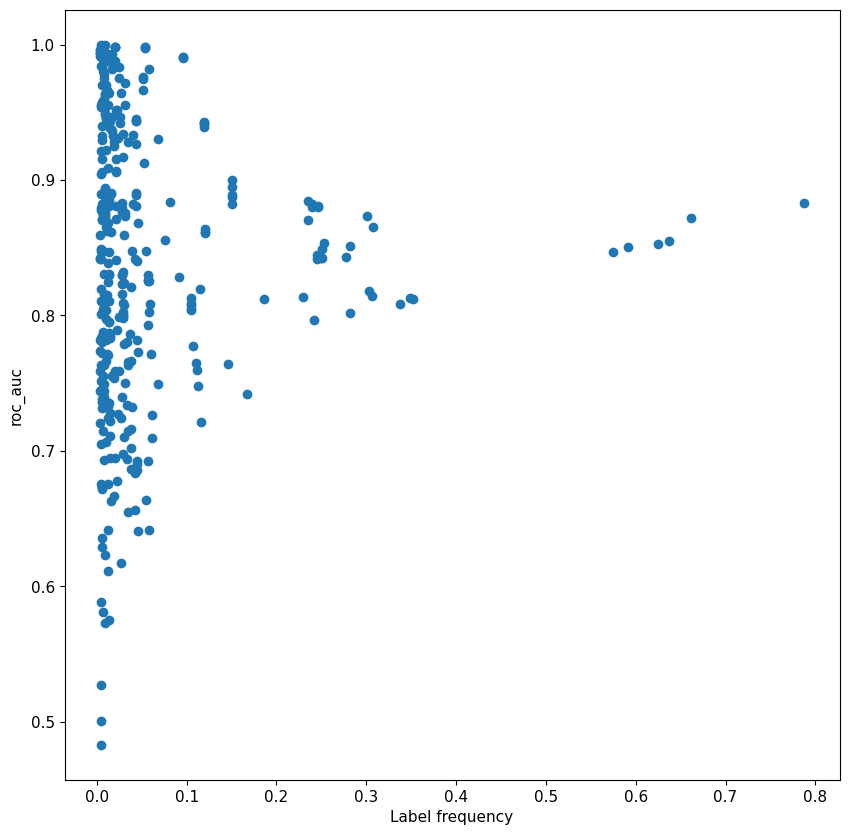

In [149]:
mlc_visualizer.plot_label_frequency_vs_metric('roc_auc')

In [153]:
mlc_visualizer.print_labels_in_range('roc_auc', max_val=0.8, min_freq=0.02)

score: 0.6175, freq: 0.0271, label: ('left shoulder', 'tubesandlines', 'picc')
score: 0.6407, freq: 0.0454, label: ('right upper lung zone', 'anatomicalfinding', 'lung opacity')
score: 0.6416, freq: 0.0575, label: ('right upper lung zone', 'nlp', 'abnormal')
score: 0.6550, freq: 0.0342, label: ('left lower lung zone', 'anatomicalfinding', 'linear/patchy atelectasis')
score: 0.6566, freq: 0.0428, label: ('right shoulder', 'tubesandlines', 'picc')
score: 0.6638, freq: 0.0546, label: ('anatomicalfinding', 'linear/patchy atelectasis')
score: 0.6780, freq: 0.0229, label: ('left apical zone', 'anatomicalfinding', 'lung opacity')
score: 0.6834, freq: 0.0425, label: ('left lung', 'anatomicalfinding', 'linear/patchy atelectasis')
score: 0.6859, freq: 0.0446, label: ('right lung', 'anatomicalfinding', 'lung lesion')
score: 0.6867, freq: 0.0384, label: ('anatomicalfinding', 'enlarged hilum')
score: 0.6906, freq: 0.0450, label: ('right apical zone', 'nlp', 'abnormal')
score: 0.6922, freq: 0.0574, 

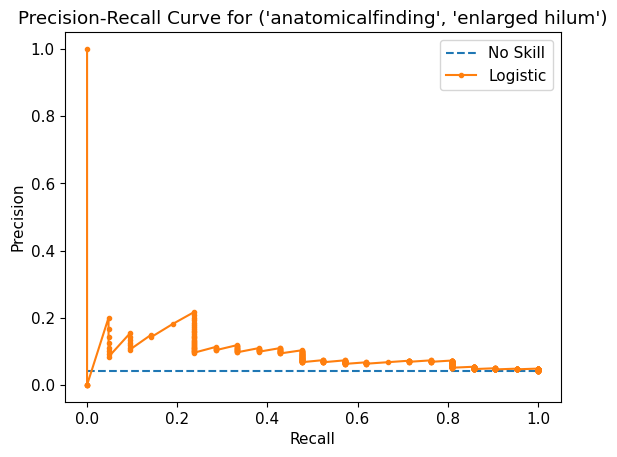

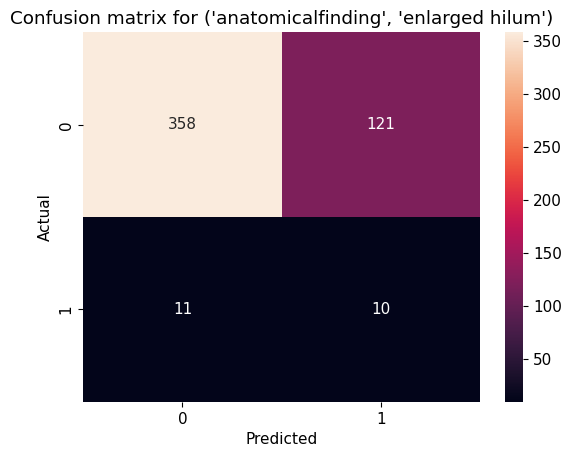

p: 0.0763, r: 0.4762, f1: 0.1316, roc_auc: 0.6867, pr_auc: 0.0909


In [162]:
label_name = ('anatomicalfinding', 'enlarged hilum')
mlc_visualizer.compute_metrics_from_probs(label_name)

In [163]:
mlc_visualizer.save_examples_for_label_as_pdf_files(
    label_name=label_name, save_dir='../__tmp/', ntp=1, nfn=3, nfp=2, ntn=0,
)

Saving examples for enlarged hilum
len(gt_pos_idxs): 4, len(gt_neg_idxs): 2
Saving ../__tmp/enlarged_hilum/enlarged_hilum__positive_1.pdf
Saving ../__tmp/enlarged_hilum/enlarged_hilum__positive_2.pdf
Saving ../__tmp/enlarged_hilum/enlarged_hilum__positive_3.pdf
Saving ../__tmp/enlarged_hilum/enlarged_hilum__positive_4.pdf
Saving ../__tmp/enlarged_hilum/enlarged_hilum__negative_1.pdf
Saving ../__tmp/enlarged_hilum/enlarged_hilum__negative_2.pdf


False Negative
dicom_id: 5bc7f32a-d1e93cca-6360ecd5-75ec637a-974a8e3e
Label: ('anatomicalfinding', 'lung lesion'), prob: 0.2679
--------------------------------------------------
dicom_id = 5bc7f32a-d1e93cca-6360ecd5-75ec637a-974a8e3e
image_path = /mnt/data/mimic-cxr-jpg/images/p15/p15610631/s59150383/5bc7f32a-d1e93cca-6360ecd5-75ec637a-974a8e3e.jpg


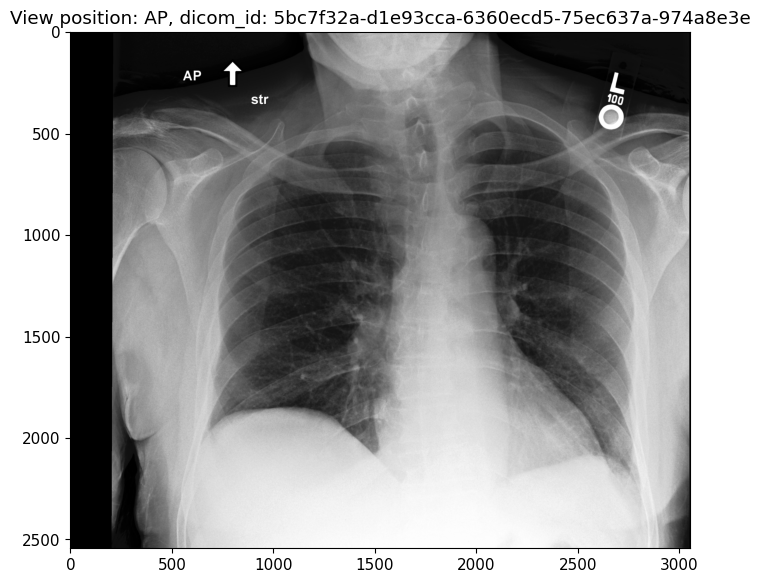


--------------------------------------------------------------------------------
Original report:
 WET READ: ___ ___ ___ 6:56 PM
  4 to 5 mm left mid lung nodular opacity, may be artifactual/overlapping
  structures, but underlying pulm nodule not excluded.  recommend shallow
  obliques or nonurgent chest CT for further evaluation. no pneumomediastinum.
  
 WET READ VERSION #1 
 ______________________________________________________________________________
                                 FINAL REPORT
 EXAM:  Chest frontal and lateral views.
 
 CLINICAL INFORMATION:  ___-year-old male with vomiting for two days, weight
 loss.
 
 COMPARISON:  ___.
 
 FINDINGS:  Frontal and lateral views of the chest were obtained.  A subtle 4-5
 mm somewhat rounded opacity projecting over the left mid lung may be
 artifactual, although underlying pulmonary nodule is not excluded.  The right
 lung is clear.  There is no focal consolidation, pleural effusion, or
 pneumothorax is seen.  Cardiac and medias

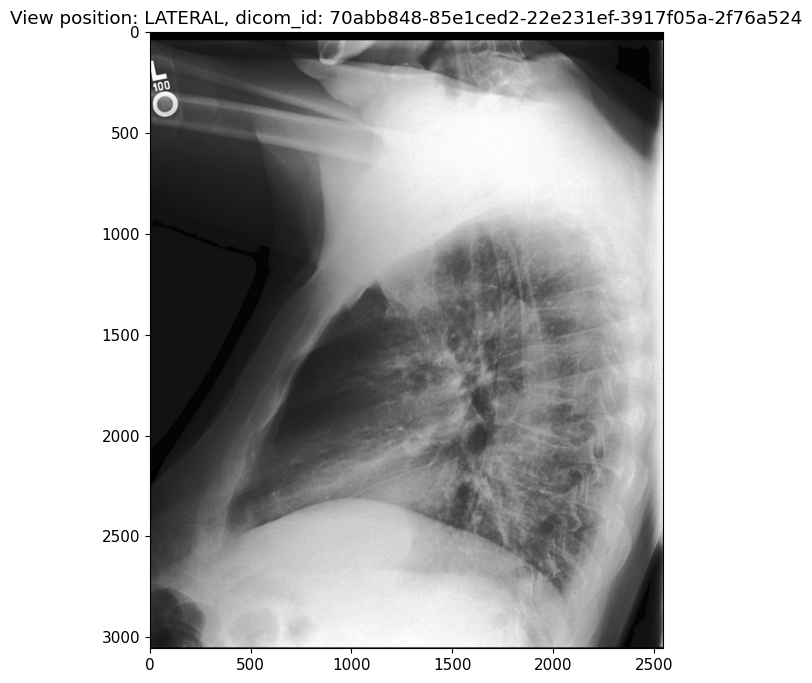

In [35]:
mlc_visualizer.plot_false_negative_example_for_label(
    ('anatomicalfinding', 'lung lesion'), show_scene_graph=False)

In [165]:
reload(medvqa.utils.files)

<module 'medvqa.utils.files' from '/home/pamessina/medvqa/medvqa/utils/files.py'>

In [166]:
from medvqa.utils.files import zip_files_and_folders_in_dir

In [167]:
zip_files_and_folders_in_dir(
    dir_path='../__tmp/',
    file_or_folder_names=[
        'airspace_opacity',
        'atelectasis',
        'bone_lesion',
        'consolidation',
        'costophrenic_angle_blunting',
        'enlarged_hilum',
        'enteric_tube',
        'linear_or_patchy_atelectasis',
        'lung_lesion',
        'mass_or_nodule_(not_otherwise_specified)',
        'mediastinal_widening',
        'picc',
        'pleural_or_parenchymal_scarring',
        'pneumonia',
        'pneumothorax',
        'prosthetic_valve',
        'pulmonary_edema_or_hazy_opacity',
        'rib_fracture',
        'spinal_degenerative_changes',
        'spinal_fracture',
        'subclavian_line',
        'swan-ganz_catheter',
    ],
    output_path='../__tmp/examples_per_label.zip',
)

In [77]:
from medvqa.datasets.mimiccxr import save_report_image_and_other_images_as_pdf

save_report_image_and_other_images_as_pdf('5bc7f32a-d1e93cca-6360ecd5-75ec637a-974a8e3e', 'test5.pdf')

In [79]:
"asd fdsfasd ".title()

'Asd Fdsfasd '

In [78]:
!ls -lh test5.pdf

-rw-rw-r-- 1 pamessina pamessina 3.5M Apr 14 18:24 test5.pdf


In [70]:

def generate_html_file_with_image_and_caption(image_path, caption):
#     html = f"""
#     <html>
#     <head>
#     <style>
#     img {{
#         width: 100%;
#     }}
#     </style>
#     </head>
#     <body>
#     <img src="{image_path}" alt="Image">
#     <p>{caption}</p>
#     </body>
#     </html>
#     """
    import html
    html_string = f"""
        <html>
        <head>
        <style>
        img {{
            width: 100%;
        }}
        </style>
        </head>
        <body>
        <p>{html.escape(caption)}</p>
        </body>
        </html>
        """
    return html_string

In [39]:
import pdfkit

In [71]:
html_string = generate_html_file_with_image_and_caption(
    image_path = "/mnt/data/mimic-cxr-jpg/images/p15/p15610631/s59150383/5bc7f32a-d1e93cca-6360ecd5-75ec637a-974a8e3e.jpg",
    caption = '''WET READ: ___ ___ ___ 6:56 PM
  4 to 5 mm left mid lung nodular opacity, may be artifactual/overlapping
  structures, but underlying pulm nodule not excluded.  recommend shallow
  obliques or nonurgent chest CT for further evaluation. no pneumomediastinum.
  
 WET READ VERSION #1 
 ______________________________________________________________________________
                                 FINAL REPORT
 EXAM:  Chest frontal and lateral views.
 
 CLINICAL INFORMATION:  ___-year-old male with vomiting for two days, weight
 loss.
 
 COMPARISON:  ___.
 
 FINDINGS:  Frontal and lateral views of the chest were obtained.  A subtle 4-5
 mm somewhat rounded opacity projecting over the left mid lung may be
 artifactual, although underlying pulmonary nodule is not excluded.  The right
 lung is clear.  There is no focal consolidation, pleural effusion, or
 pneumothorax is seen.  Cardiac and mediastinal silhouettes are unremarkable.
 
 IMPRESSION:  Subtle 4-5 mm focal opacity projecting over the left mid lung may
 be artifactual due to overlying structures.  However, underlying pulmonary
 nodule is not excluded.  Recommend further evaluation with shallow obliques or
 nonurgent chest CT.
'''
)

In [73]:
caption = '''WET READ: ___ ___ ___ 6:56 PM
  4 to 5 mm left mid lung nodular opacity, may be artifactual/overlapping
  structures, but underlying pulm nodule not excluded.  recommend shallow
  obliques or nonurgent chest CT for further evaluation. no pneumomediastinum.
  
 WET READ VERSION #1 
 ______________________________________________________________________________
                                 FINAL REPORT
 EXAM:  Chest frontal and lateral views.
 
 CLINICAL INFORMATION:  ___-year-old male with vomiting for two days, weight
 loss.
 
 COMPARISON:  ___.
 
 FINDINGS:  Frontal and lateral views of the chest were obtained.  A subtle 4-5
 mm somewhat rounded opacity projecting over the left mid lung may be
 artifactual, although underlying pulmonary nodule is not excluded.  The right
 lung is clear.  There is no focal consolidation, pleural effusion, or
 pneumothorax is seen.  Cardiac and mediastinal silhouettes are unremarkable.
 
 IMPRESSION:  Subtle 4-5 mm focal opacity projecting over the left mid lung may
 be artifactual due to overlying structures.  However, underlying pulmonary
 nodule is not excluded.  Recommend further evaluation with shallow obliques or
 nonurgent chest CT.
'''

In [75]:
import html
html.entities(caption)

'WET READ: ___ ___ ___ 6:56 PM\n  4 to 5 mm left mid lung nodular opacity, may be artifactual/overlapping\n  structures, but underlying pulm nodule not excluded.  recommend shallow\n  obliques or nonurgent chest CT for further evaluation. no pneumomediastinum.\n  \n WET READ VERSION #1 \n ______________________________________________________________________________\n                                 FINAL REPORT\n EXAM:  Chest frontal and lateral views.\n \n CLINICAL INFORMATION:  ___-year-old male with vomiting for two days, weight\n loss.\n \n COMPARISON:  ___.\n \n FINDINGS:  Frontal and lateral views of the chest were obtained.  A subtle 4-5\n mm somewhat rounded opacity projecting over the left mid lung may be\n artifactual, although underlying pulmonary nodule is not excluded.  The right\n lung is clear.  There is no focal consolidation, pleural effusion, or\n pneumothorax is seen.  Cardiac and mediastinal silhouettes are unremarkable.\n \n IMPRESSION:  Subtle 4-5 mm focal opacit

In [72]:
print(html_string)


        <html>
        <head>
        <style>
        img {
            width: 100%;
        }
        </style>
        </head>
        <body>
        <p>WET READ: ___ ___ ___ 6:56 PM
  4 to 5 mm left mid lung nodular opacity, may be artifactual/overlapping
  structures, but underlying pulm nodule not excluded.  recommend shallow
  obliques or nonurgent chest CT for further evaluation. no pneumomediastinum.
  
 WET READ VERSION #1 
 ______________________________________________________________________________
                                 FINAL REPORT
 EXAM:  Chest frontal and lateral views.
 
 CLINICAL INFORMATION:  ___-year-old male with vomiting for two days, weight
 loss.
 
 COMPARISON:  ___.
 
 FINDINGS:  Frontal and lateral views of the chest were obtained.  A subtle 4-5
 mm somewhat rounded opacity projecting over the left mid lung may be
 artifactual, although underlying pulmonary nodule is not excluded.  The right
 lung is clear.  There is no focal consolidation, pleural 

In [57]:
pdfkit.from_string(html_string, options={"enable-local-file-access": ""}, output_path='test2.pdf')

True

In [58]:
!ls -lh test2.pdf

-rw-rw-r-- 1 pamessina pamessina 12K Apr 14 17:06 test2.pdf


Image path: /mnt/data/mimic-cxr-jpg/images/p14/p14294216/s58840050/597cdcdc-de26c96e-a31f6e22-683a78bd-06e3b34c.jpg
Object: right lung (504, 382, 1078, 1746)
Object: right upper lung zone (668, 450, 914, 832)
Object: right mid lung zone (586, 1282, 901, 300)
Object: right lower lung zone (504, 1582, 914, 546)
Object: right hilar structures (1036, 1214, 492, 423)
Object: right apical zone (764, 382, 818, 586)
Object: right costophrenic angle (368, 1910, 273, 272)
Object: right cardiophrenic angle (1050, 1664, 177, 382)
Object: right hemidiaphragm (504, 1759, 1078, 410)
Object: left lung (1596, 463, 1132, 1856)
Object: left upper lung zone (1719, 532, 845, 750)
Object: left mid lung zone (1719, 1282, 886, 368)
Object: left lower lung zone (1596, 1650, 1132, 669)
Object: left hilar structures (1650, 1200, 505, 519)
Object: left apical zone (1719, 463, 804, 505)
Object: left costophrenic angle (2592, 2128, 273, 273)
Object: left hemidiaphragm (1596, 2046, 1132, 273)
Object: trachea (1337, 

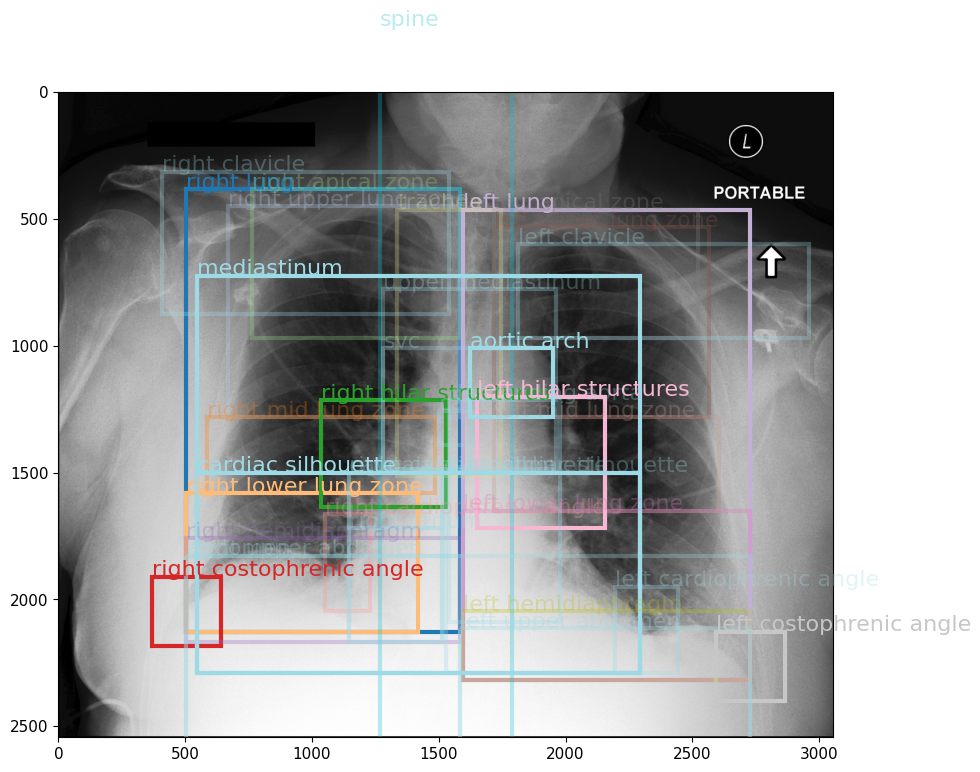

Labels:
('right lung', 'anatomicalfinding', 'consolidation', 0)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 0)
('right lung', 'anatomicalfinding', 'consolidation', 0)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 0)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'pleural effusion', 0)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 0)
('right lung', 'anatomicalfinding', 'atelectasis', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'atelectasis', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'consolidation', 0)
('right lower lung zone', 'anatomicalfinding', 'atelectasis', 1)
('right lower lung zone', 'anatomicalfinding', 'lung opacity', 1)
('right lower lung zone', 'nlp', 'abnormal', 1)
('right lower lung zone', 'anatomicalfinding

In [34]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import visualize_scene_graph, load_scene_graph
visualize_scene_graph(load_scene_graph('597cdcdc-de26c96e-a31f6e22-683a78bd-06e3b34c'))

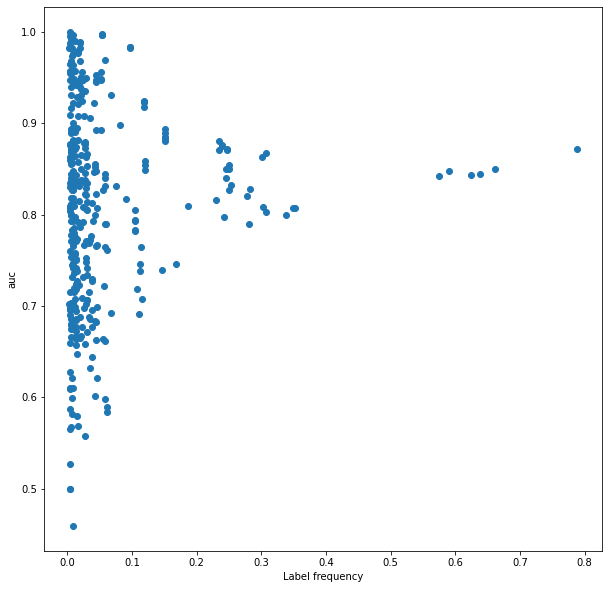

In [34]:
mlc_visualizer.plot_label_frequency_vs_metric('auc')

In [95]:
mlc_visualizer.metrics.keys()

dict_keys(['chestimagenome_label_prf1', 'chestimagenome_label_acc', 'chestimagenome_label_rocauc', 'chestimagenome_label_auc', 'chestimagenome_label_prcauc', 'chest_imagenome_label_names'])

In [96]:
_idx = mlc_visualizer.metrics['chest_imagenome_label_names'].index(('upper mediastinum', 'tubesandlines', 'swan-ganz catheter'))
mlc_visualizer.metrics['chestimagenome_label_prf1']['p'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prf1']['r'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prf1']['f1'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_rocauc']['per_class'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_auc']['per_class'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prcauc']['per_class'][_idx]

(0.0, 0.0, 0, 0.969939879759519, 0.969939879759519, 0.03125)

In [97]:
mlc_visualizer.print_labels_in_range('auc', min_val=0.9, max_freq=0.01)

score: 0.9046, freq: 0.0048, label: ('left mid lung zone', 'disease', 'aspiration')
score: 0.9059, freq: 0.0055, label: ('left lung', 'disease', 'alveolar hemorrhage')
score: 0.9155, freq: 0.0056, label: ('upper mediastinum', 'tubesandlines', 'endotracheal tube')
score: 0.9218, freq: 0.0044, label: ('left hilar structures', 'anatomicalfinding', 'consolidation')
score: 0.9224, freq: 0.0097, label: ('left hilar structures', 'disease', 'pneumonia')
score: 0.9298, freq: 0.0059, label: ('anatomicalfinding', 'increased reticular markings/ild pattern')
score: 0.9325, freq: 0.0059, label: ('right lung', 'anatomicalfinding', 'increased reticular markings/ild pattern')
score: 0.9403, freq: 0.0059, label: ('left lung', 'anatomicalfinding', 'increased reticular markings/ild pattern')
score: 0.9479, freq: 0.0094, label: ('cardiac silhouette', 'tubesandlines', 'swan-ganz catheter')
score: 0.9499, freq: 0.0094, label: ('mediastinum', 'tubesandlines', 'swan-ganz catheter')
score: 0.9538, freq: 0.0040,

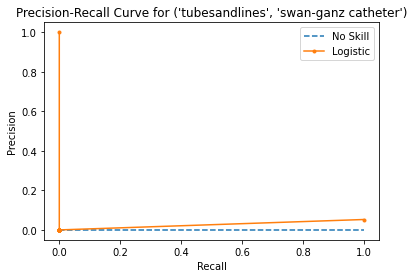

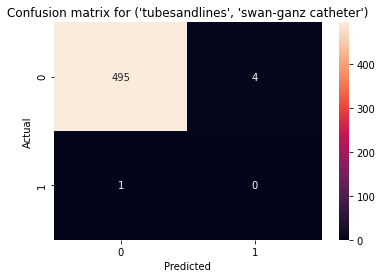

p: 0.0000, r: 0.0000, f1: 0.0000, roc_auc: 0.9639, pr_auc: 0.0263


In [98]:
mlc_visualizer.compute_metrics_from_probs(('tubesandlines', 'swan-ganz catheter'))

Positive example:
dicom_id: 66cab843-95809cae-6a67db82-36faecab-8a75c30e
Label: ('left lung', 'anatomicalfinding', 'atelectasis'), prob: 0.8048
--------------------------------------------------
Image path: /mnt/data/mimic-cxr-jpg/images/p10/p10975446/s59969148/66cab843-95809cae-6a67db82-36faecab-8a75c30e.jpg
Object: right lung (260, 481, 728, 1586)
Object: right upper lung zone (260, 546, 728, 546)
Object: right mid lung zone (260, 1092, 624, 351)
Object: right lower lung zone (260, 1443, 598, 624)
Object: right hilar structures (572, 1014, 364, 494)
Object: right apical zone (273, 481, 715, 338)
Object: right costophrenic angle (130, 1729, 260, 260)
Object: right cardiophrenic angle (481, 1677, 221, 351)
Object: right hemidiaphragm (260, 1794, 845, 286)
Object: left lung (1079, 520, 936, 1521)
Object: left upper lung zone (1105, 585, 702, 507)
Object: left mid lung zone (1079, 1092, 793, 338)
Object: left lower lung zone (1118, 1430, 897, 611)
Object: left hilar structures (1079, 101

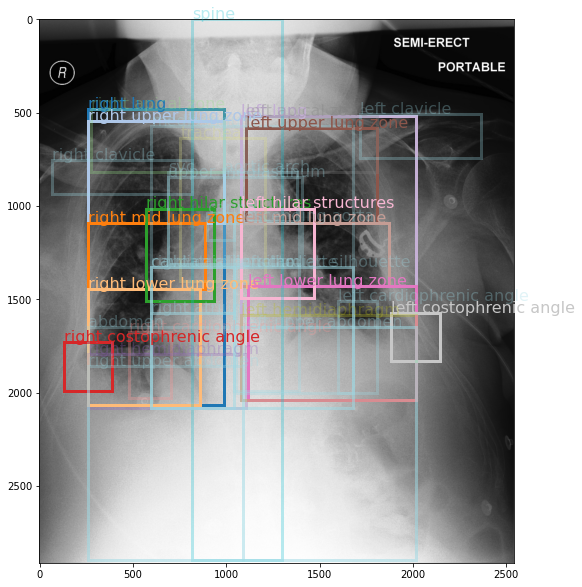

Labels:
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right lung', 'anatomicalfinding', 'vascular congestion', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'pleural effusion', 0)
('right lung', 'anatomicalfinding', 'pneumothorax', 0)
('right lung', 'anatomicalfinding', 'atelectasis', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'anatomicalfinding', 'pleural/parenchymal scarring', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'anatomicalfinding', 'vascular congestion', 1)
('right lung', 'nlp', 'abnormal', 1)
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'disease', 'pneumonia', 1)
('right lung', 'nlp', 'abnormal', 1)
('right upper lung zone', 'anatomicalfinding', 'lung opa

In [99]:
mlc_visualizer.plot_positive_example_for_label(('left lung', 'anatomicalfinding', 'atelectasis'))

Positive example:
dicom_id: 047cee43-febc0dbc-c090646c-e655c728-c0bb1ece
Label: ('tubesandlines', 'swan-ganz catheter'), prob: 0.0744
--------------------------------------------------
Image path: /mnt/data/mimic-cxr-jpg/images/p12/p12604446/s59246897/047cee43-febc0dbc-c090646c-e655c728-c0bb1ece.jpg
Object: right lung (422, 313, 994, 1497)
Object: right upper lung zone (680, 340, 736, 545)
Object: right mid lung zone (531, 885, 844, 326)
Object: right lower lung zone (422, 1211, 912, 599)
Object: right hilar structures (953, 816, 435, 450)
Object: right apical zone (898, 313, 518, 272)
Object: right costophrenic angle (285, 1593, 273, 272)
Object: right cardiophrenic angle (1116, 1484, 150, 408)
Object: right hemidiaphragm (422, 1565, 1157, 300)
Object: left lung (1593, 313, 1089, 1838)
Object: left upper lung zone (1593, 340, 748, 545)
Object: left mid lung zone (1606, 885, 872, 462)
Object: left lower lung zone (1593, 1347, 1089, 804)
Object: left hilar structures (1593, 789, 449, 64

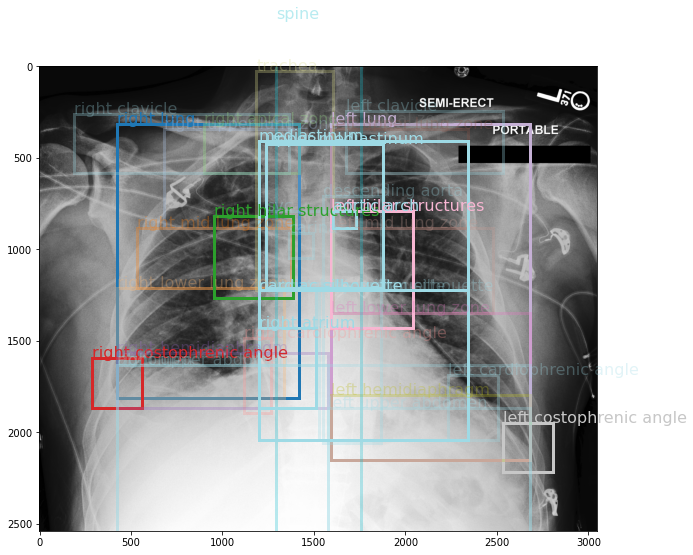

Labels:
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'anatomicalfinding', 'pleural effusion', 1)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right lung', 'nlp', 'abnormal', 1)
('right hilar structures', 'tubesandlines', 'swan-ganz catheter', 1)
('right hilar structures', 'anatomicalfinding', 'lung opacity', 1)
('right hilar structures', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right hilar structures', 'nlp', 'abnormal', 1)
('right costophrenic angle', 'anatomicalfinding', 'lung opacity', 1)
('right costophrenic angle', 'anatomicalfinding', 'pleural effusion', 1)
('right costophrenic angle', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right costophrenic angle', 'nlp', 'abnormal', 1)
('left lung', 'anatomicalfinding', 'lung opacity', 1)
('left lung', 'anatomicalfinding', 'pleural effusion', 1)
('left lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('left lung', 'nlp', 'abnormal', 1)
('left

In [47]:
mlc_visualizer.plot_positive_example_for_label(('tubesandlines', 'swan-ganz catheter'))